<a href="https://colab.research.google.com/github/au171/Busi525_hw1/blob/main/Busi_524_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1

##Question 1
In this simulation (provided below) the number of skilled firms at the 5% level is 50. Since the pvalues result from a two-sided test, I use a pvalue of .10 to determine significant alpha estimates.

## Question 2
Plots provided below.

## Question 3
The distribution of p-values looks like a uniform distribution because none of the funds are skilled.

In [179]:
|import numpy as np

# parameters
N = 1000
T = 120
sigma_m = 0.20
sigma_e = 0.3
mu = 0.05

r_m = np.random.normal(mu/12, sigma_m/np.sqrt(12), size=(T, 1))
eps_i = np.random.normal(0, sigma_e/np.sqrt(12), size = (T, N))

r_i = 0 + r_m + eps_i


# Print results
print(r_i.shape)


(120, 1000)


In [180]:
import statsmodels.api as sm

r_m_const = sm.add_constant(r_m)

alpha = np.zeros(N)
tstats = np.zeros(N)
pvalues = np.zeros(N)

for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
#pvalue_vector = np.where(pvalues > 0.1, 1, 0)


In [181]:
significant_alphas = sum((tstats > 0)& (pvalues/2 < 0.05))
print(f"Number of funds significantly skilled at the 5% level: {significant_alphas}")

Number of funds significantly skilled at the 5% level: 50


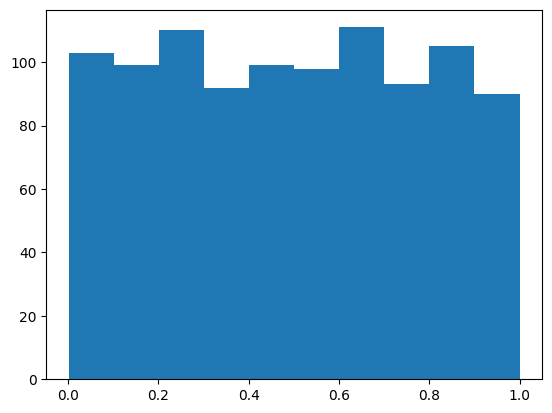

In [182]:
import matplotlib.pyplot as plt

plt.hist(pvalues)
plt.show()


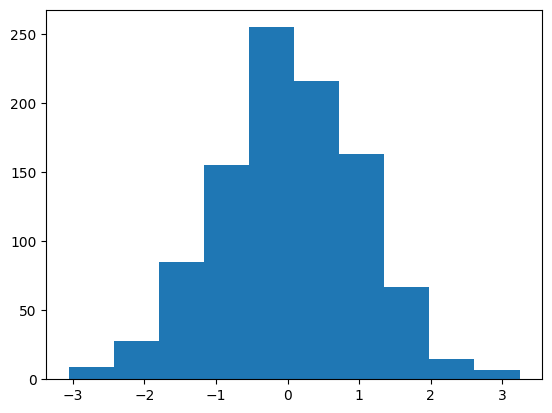

In [183]:
plt.hist(tstats)
plt.show()

#Part 2

###Question 1
The p-value distribution slightly skews to the left as the number of truly skilled funds increases. However, the change is very small because of the reisdual volatility of 30% per year.

##Question 2
I've reported the number of truly skilled funds that have an insignificant alpha in the tables below each lambda, but the main takeaway is that it's a large proportion. As the lambda increases, then the the total number of truly skilled funds with significant alpha estimates increases as well , though slightly. Conditional on being a skilled firm, however, the fraction of significant alpha funds doesn't change by a large magnitude.

On the other hand, most unskilled firms are correctly classified: the number that are identified as skilled based on significantly positive alpha estimates tends to be around the same percentage. In this simulation, of the unskilled firms, about 4-5% have a significantly positive alpha.  

In [184]:
eps_i = np.random.normal(0, sigma_e/np.sqrt(12), size = (T, N))
lam = .1
alpha_i = np.concatenate([.025/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i

r_m_const = sm.add_constant(r_m)

alpha = np.zeros(N)
tstats = np.zeros(N)
pvalues = np.zeros(N)

for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]


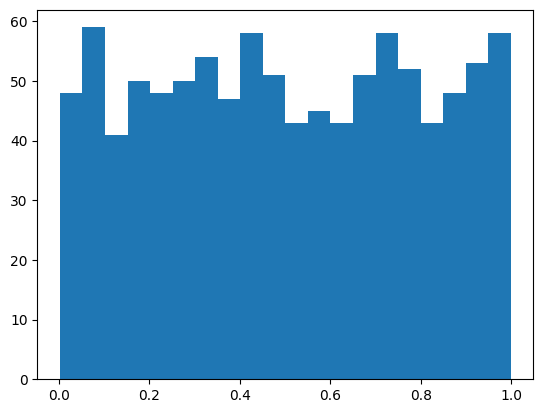

In [185]:
plt.hist(pvalues, bins = 20)
plt.show()


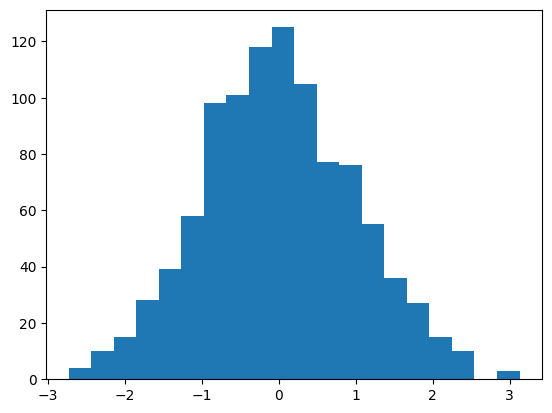

In [186]:
plt.hist(tstats, bins = 20)
plt.show()

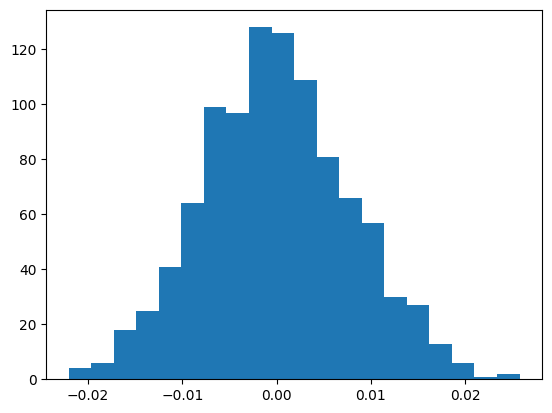

In [187]:
plt.hist(alpha, bins = 20)
plt.show()

In [188]:
# Since the pvalues result from a two-sided test, using a pvalue of .10 to determine significant alpha estimates.

import pandas as pd

df = pd.DataFrame(index=['True','False'], columns=['True','False'])

df.iloc[0, 0] = ((pvalues < 0.1)&(tstats > 0))[:round(lam*N)].sum() / N
df.iloc[0, 1] = ((pvalues >= 0.1)|(tstats <= 0))[:round(lam*N)].sum() / N
df.iloc[1, 0] = ((pvalues < 0.1)&(tstats > 0))[round(lam*N):].sum() / N
df.iloc[1, 1] = ((pvalues >= 0.1)|(tstats <= 0))[round(lam*N):].sum() / N

print(df)


        True  False
True   0.012  0.088
False  0.045  0.855


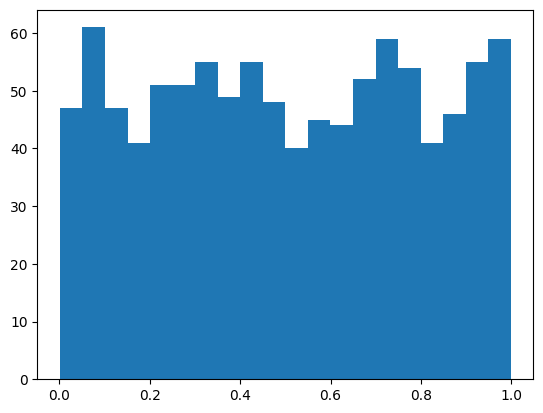

In [189]:
lam = .25
alpha_i = np.concatenate([.025/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i

alpha = np.zeros(N)
tstats = np.zeros(N)
pvalues = np.zeros(N)

for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
plt.hist(pvalues, bins = 20)
plt.show()


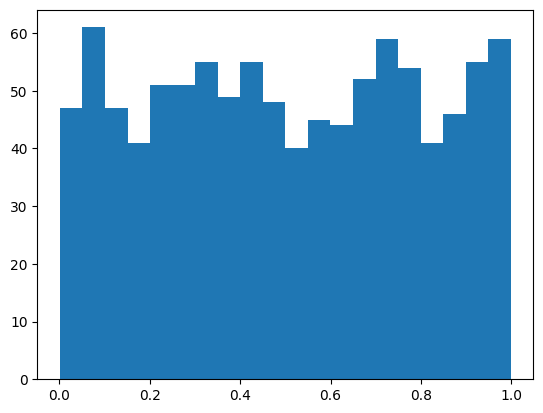

In [190]:
plt.hist(pvalues, bins = 20)
plt.show()

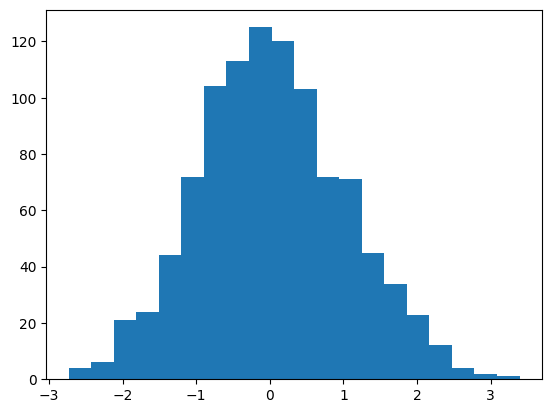

In [191]:
plt.hist(tstats, bins = 20)
plt.show()

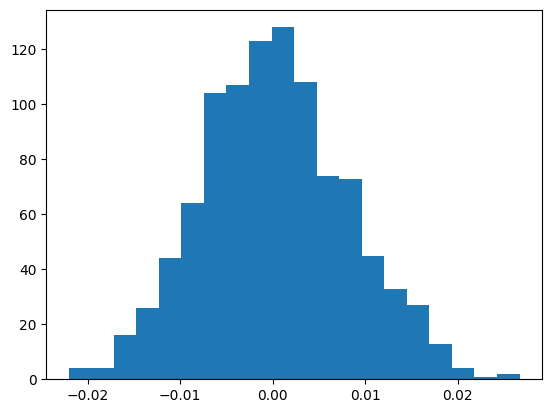

In [192]:
plt.hist(alpha, bins = 20)
plt.show()

In [193]:
df = pd.DataFrame(index=['True','False'], columns=['True','False'])

df.iloc[0, 0] = ((pvalues < 0.1)&(tstats > 0))[:round(lam*N)].sum() / N
df.iloc[0, 1] = ((pvalues >= 0.1)|(tstats <= 0))[:round(lam*N)].sum() / N
df.iloc[1, 0] = ((pvalues < 0.1)&(tstats > 0))[round(lam*N):].sum() / N
df.iloc[1, 1] = ((pvalues >= 0.1)|(tstats <= 0))[round(lam*N):].sum() / N

print(df)


        True  False
True   0.026  0.224
False  0.036  0.714


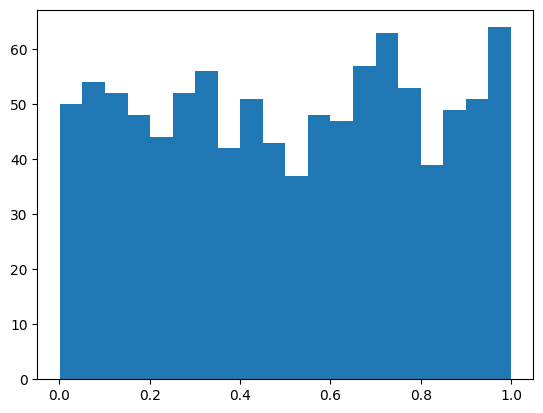

In [194]:
lam = .5
alpha_i = np.concatenate([.025/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i

alpha = np.zeros(N)
tstats = np.zeros(N)
pvalues = np.zeros(N)

for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
plt.hist(pvalues, bins = 20)
plt.show()


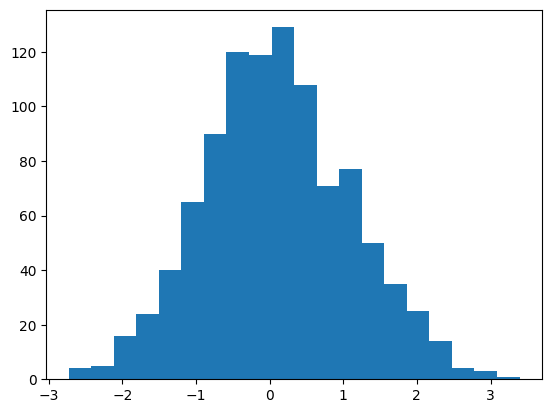

In [195]:
plt.hist(tstats, bins = 20)
plt.show()

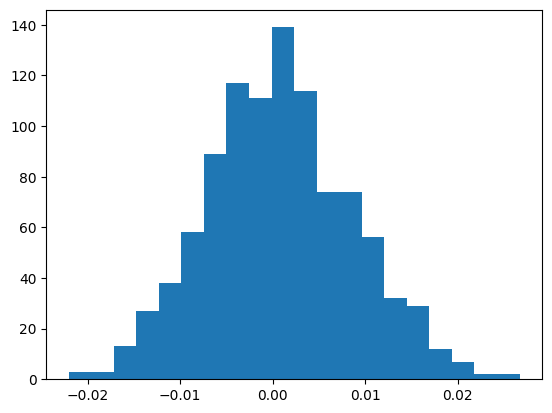

In [196]:
plt.hist(alpha, bins = 20)
plt.show()

In [197]:
df = pd.DataFrame(index=['True','False'], columns=['True','False'])

df.iloc[0, 0] = ((pvalues < 0.1)&(tstats > 0))[:round(lam*N)].sum() / N
df.iloc[0, 1] = ((pvalues >= 0.1)|(tstats <= 0))[:round(lam*N)].sum() / N
df.iloc[1, 0] = ((pvalues < 0.1)&(tstats > 0))[round(lam*N):].sum() / N
df.iloc[1, 1] = ((pvalues >= 0.1)|(tstats <= 0))[round(lam*N):].sum() / N

print(df)

        True  False
True   0.043  0.457
False  0.023  0.477


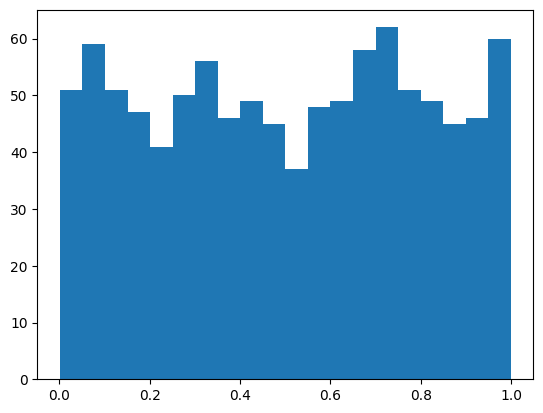

In [198]:
lam = .75
alpha_i = np.concatenate([.025/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i

alpha = np.zeros(N)
tstats = np.zeros(N)
pvalues = np.zeros(N)

for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
plt.hist(pvalues, bins = 20)
plt.show()


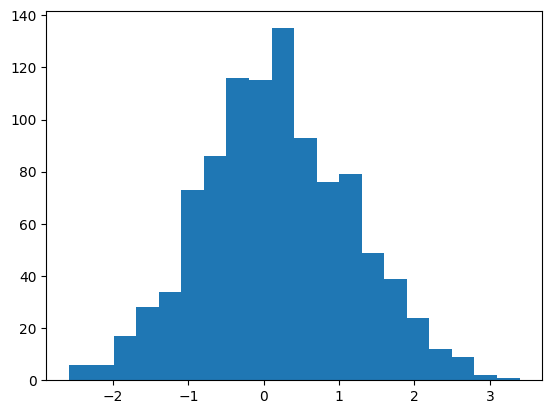

In [199]:
plt.hist(tstats, bins = 20)
plt.show()

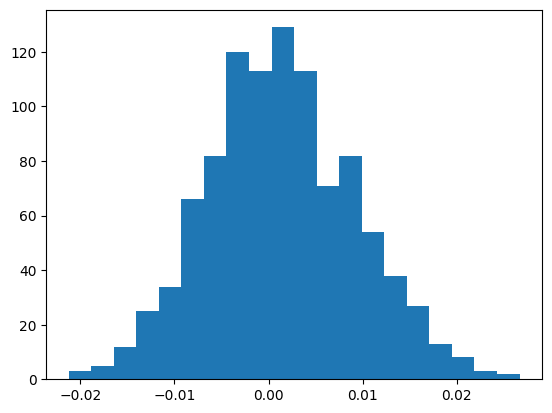

In [200]:
plt.hist(alpha, bins = 20)
plt.show()

In [201]:
df = pd.DataFrame(index=['True','False'], columns=['True','False'])

df.iloc[0, 0] = ((pvalues < 0.1)&(tstats > 0))[:round(lam*N)].sum() / N
df.iloc[0, 1] = ((pvalues >= 0.1)|(tstats <= 0))[:round(lam*N)].sum() / N
df.iloc[1, 0] = ((pvalues < 0.1)&(tstats > 0))[round(lam*N):].sum() / N
df.iloc[1, 1] = ((pvalues >= 0.1)|(tstats <= 0))[round(lam*N):].sum() / N

print(df)

        True  False
True   0.064  0.686
False  0.012  0.238
